# 가상머신 설치

## 호스트와 파일 공유

### 1 Guest Addisions 설치를 위한 준비작업

1. 빌드도구 설치

```bash
yum install -y gcc make perl bzip2 tar
```

2. 현재 커널과 같은 버전의 헤더 설치

```bash
yum install -y "kernel-devel-$(uname -r)" "kernel-headers-$(uname -r)"
```

### 2 Guest Additions 설치

1. 필수 패키지 설치

```bash
sudo yum install -y bzip2 tar
```

2. VM의 Devices 메뉴에서 "Insert Guest Addisions CD images ..." 선택
  - 반드시 VM 화면이 나오는 Normal Start 상태
  - Headless Start 상태에서는 메뉴가 보이지 않음

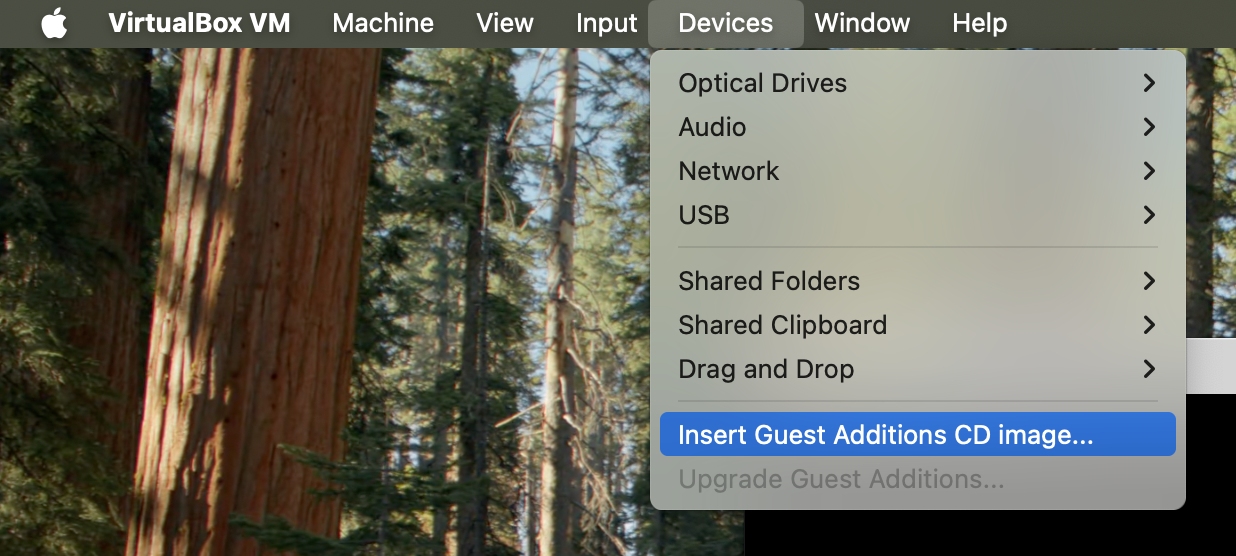

3. "Settings" > "Storage" 설정에서 이미지가 들어갔는지 확인

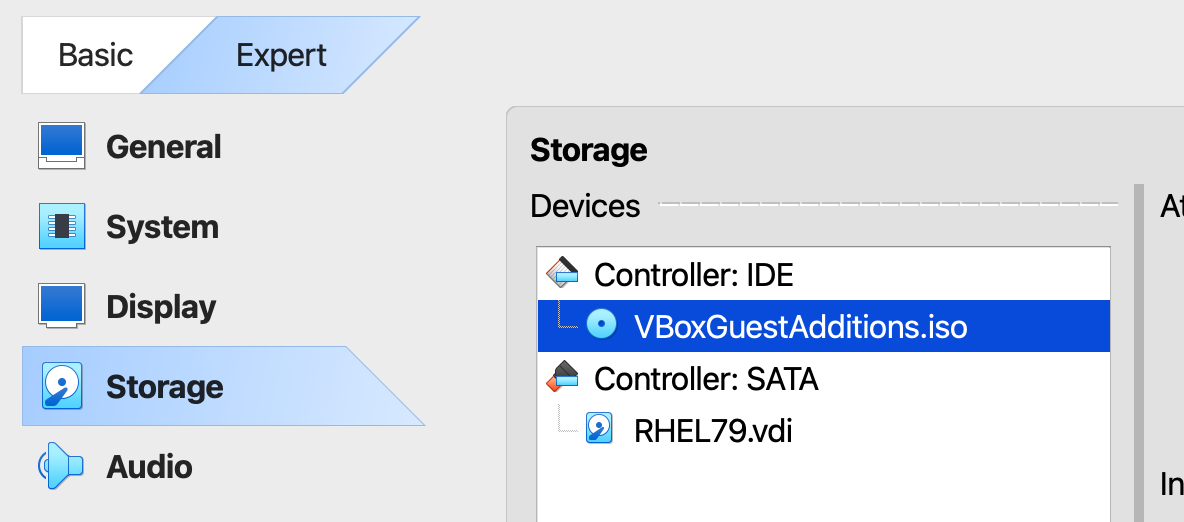

4. `lsblk` 명령으로 `sr0` 이라는 이름의 디바이스가 있는지 확인

```bash
[root@localhost run]# lsblk
NAME          MAJ:MIN RM  SIZE RO TYPE MOUNTPOINT
sda             8:0    0  100G  0 disk 
├─sda1          8:1    0    1G  0 part /boot
└─sda2          8:2    0   99G  0 part 
  ├─rhel-root 253:0    0   50G  0 lvm  /
  ├─rhel-swap 253:1    0  3.1G  0 lvm  [SWAP]
  └─rhel-home 253:2    0 45.9G  0 lvm  /home
sr0            11:0    1 58.5M  0 rom  

```

5. CD 드라이브 마운트 후 확인

```bash
[root@localhost mnt]# mount /dev/cdrom /mnt
mount: /dev/sr0 is write-protected, mounting read-only
[root@localhost mnt]# ll /mnt
total 50002
-r--r--r--. 1 root root     1048 Oct 23  2024 AUTORUN.INF
-r-xr-xr-x. 1 root root     7003 Jun  3 07:13 autorun.sh
dr-xr-xr-x. 2 root root     1468 Jun  3 07:44 cert
dr-xr-xr-x. 2 root root     1252 Jun  3 07:44 NT3x
dr-xr-xr-x. 2 root root     2828 Jun  3 07:44 OS2
-r-xr-xr-x. 1 root root     5096 Jun  3 07:13 runasroot.sh
-r--r--r--. 1 root root      653 Jun  3 07:44 TRANS.TBL
-r--r--r--. 1 root root  2094980 Jun  3 07:16 VBoxDarwinAdditions.pkg
-r-xr-xr-x. 1 root root     4224 Jun  3 07:16 VBoxDarwinAdditionsUninstall.tool
-r-xr-xr-x. 1 root root  2896398 Jun  3 07:16 VBoxLinuxAdditions-arm64.run
-r-xr-xr-x. 1 root root  6633976 Jun  3 07:13 VBoxLinuxAdditions.run
-r--r--r--. 1 root root  9540096 Jun  3 07:17 VBoxSolarisAdditions.pkg
-r-xr-xr-x. 1 root root 17975880 Jun  3 07:43 VBoxWindowsAdditions-amd64.exe
-r-xr-xr-x. 1 root root  1070688 Jun  3 07:18 VBoxWindowsAdditions.exe
-r-xr-xr-x. 1 root root 10962280 Jun  3 07:41 VBoxWindowsAdditions-x86.exe
-r--r--r--. 1 root root      261 Oct 23  2024 windows11-bypass.reg

```

6. `VBoxLinuxAdditions.run` 파일 실행
  
```bash
/mnt/VBoxLinuxAdditions.run
```

7. VM 정지

```bash
shutdown now
```

### 3. 호스트에서 공유폴더 설정

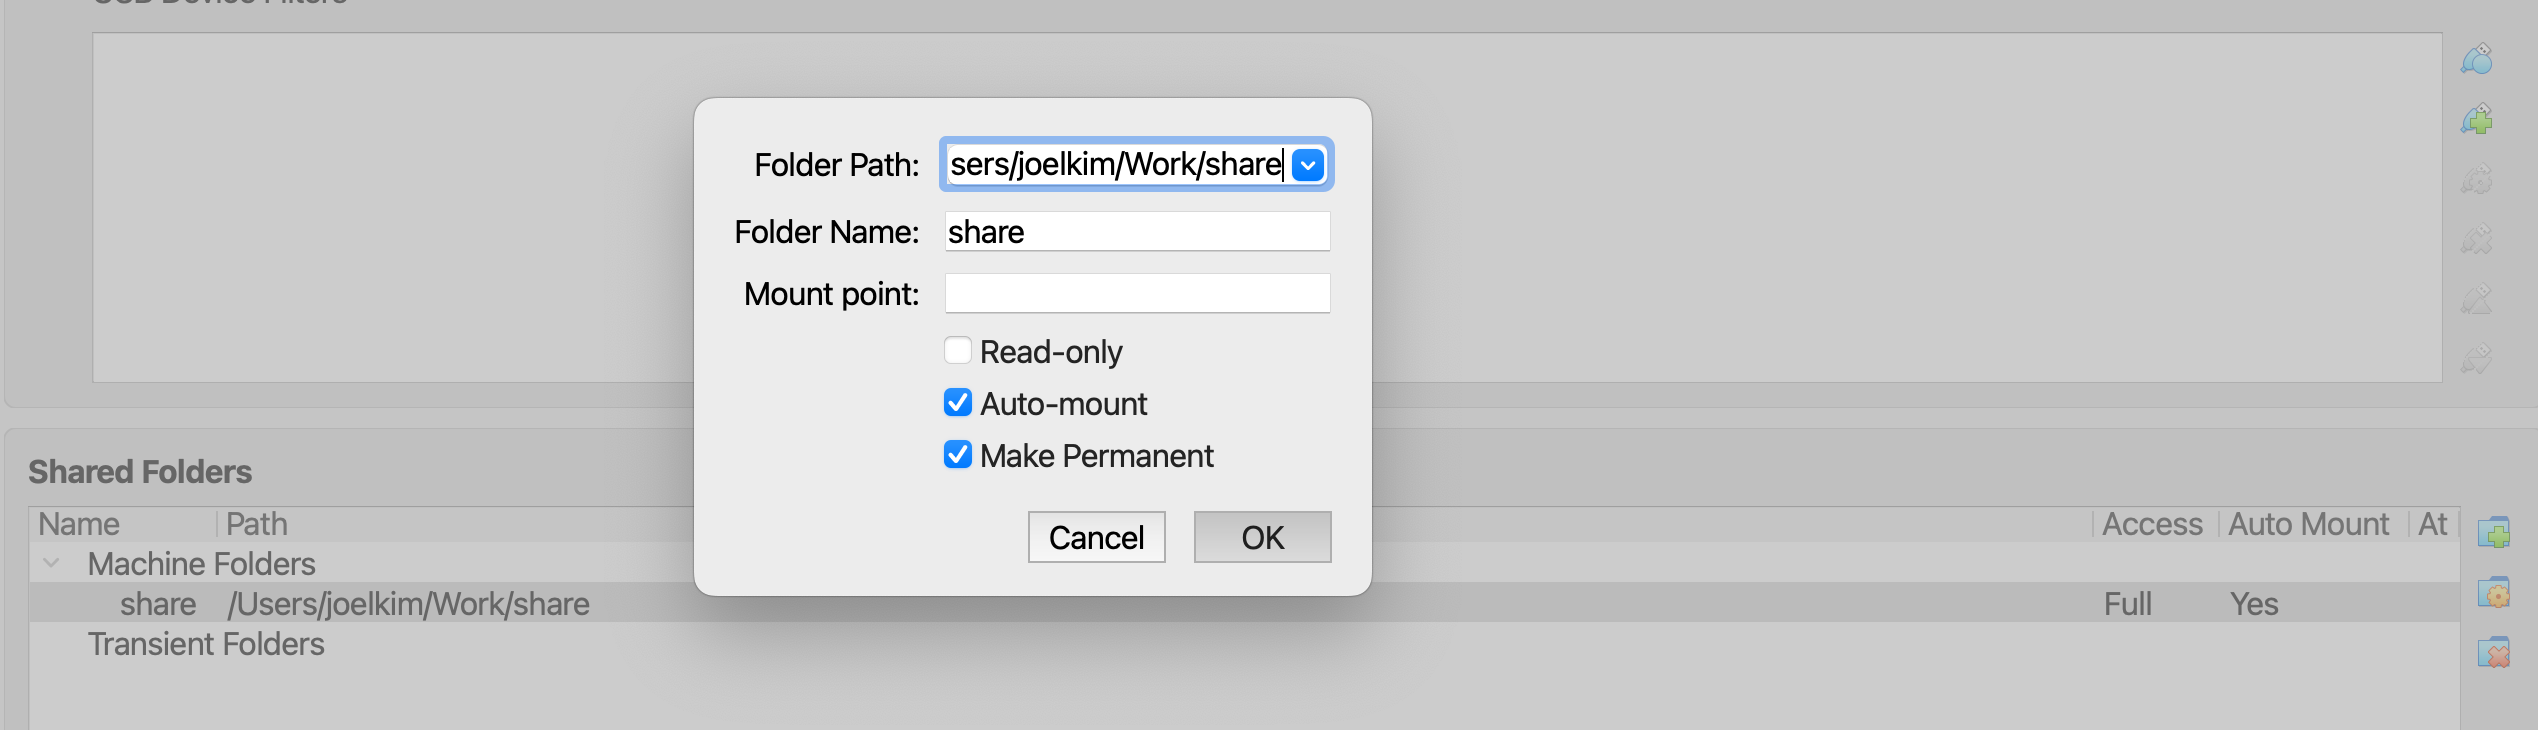

### 4 게스트에서 마운트 

```bash
mkdir -p /mnt/share
echo 'share  /mnt/share  vboxsf  defaults,_netdev,uid=1000,gid=1000  0  0' | sudo tee -a /etc/fstab
share  /mnt/share  vboxsf  defaults,_netdev,uid=1000,gid=1000  0  0
```